## Business Problem
### We have to predict the GHI for next 48 hours using the independent features that is available

### GHI :
Global Horizontal Irradiance (GHI) is the amount of terrestrial irradiance falling on a surface horizontal to the surface of the earth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [2]:
# Importing the dataset

data= pd.read_csv('Combined 18-19 data.csv')
print(data)

       Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2018      1    1     0       0    0             0           0   
1      2018      1    1     0      30    0             0           0   
2      2018      1    1     1       0    0             0           0   
3      2018      1    1     1      30    0             0           0   
4      2018      1    1     2       0    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35035  2019     12   31    21      30    0             0           4   
35036  2019     12   31    22       0    0             0           0   
35037  2019     12   31    22      30    0             0           0   
35038  2019     12   31    23       0    0             0           0   
35039  2019     12   31    23      30    0             0           0   

       Dew Point  Solar Zenith Angle  Fill Flag  Surface Albedo  Wind Speed  \
0          -10.1              166.39          0         

In [4]:
# shape of the dataset (row,column)
data.shape

(35040, 18)

In [6]:
# Columns 
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [5]:
# Checking missing values
data.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

In [8]:
# Checking datatypes of each column
data.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
GHI                     int64
Clearsky GHI            int64
Cloud Type              int64
Dew Point             float64
Solar Zenith Angle    float64
Fill Flag               int64
Surface Albedo        float64
Wind Speed            float64
Precipitable Water    float64
Wind Direction          int64
Relative Humidity     float64
Temperature           float64
Pressure                int64
dtype: object

In [3]:
# new dataframe
df= data[['GHI', 'Clearsky GHI','Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure']]
df.head()

,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,0,0,0,-10.1,166.39,0,0.17,1.5,0.6,4,26.75,7.9,948
1,0,0,0,-10.1,163.50,0,0.17,1.5,0.6,181,27.68,7.4,948
2,0,0,0,-9.5,158.96,0,0.17,1.6,0.6,357,30.04,6.9,948
3,0,0,0,-9.5,153.61,0,0.17,1.6,0.6,356,30.87,6.5,948
4,0,0,0,-8.8,147.87,0,0.17,1.6,0.6,354,33.18,6.2,948


In [4]:
# Removing the night time having GHI = 0

df = df[df['GHI'] != 0]
print(df)

       GHI  Clearsky GHI  Cloud Type  Dew Point  Solar Zenith Angle  \
14      13            13           7       -7.7               88.98   
15      47            77           4       -7.7               84.08   
16      95           161           7       -7.8               79.27   
17     150           245           7       -7.8               74.77   
18     229           324           4       -7.8               70.67   
...    ...           ...         ...        ...                 ...   
35020  399           399           0       -6.3               67.38   
35021  328           328           0       -6.3               71.02   
35022  247           247           0       -3.6               75.15   
35023  161           161           0       -3.6               79.67   
35024   29            77           4      -11.5               84.45   

       Fill Flag  Surface Albedo  Wind Speed  Precipitable Water  \
14             5            0.17         1.5                 0.8   
15         

In [15]:
# shape of the df
print(df.shape)

(17375, 13)


### Correlation

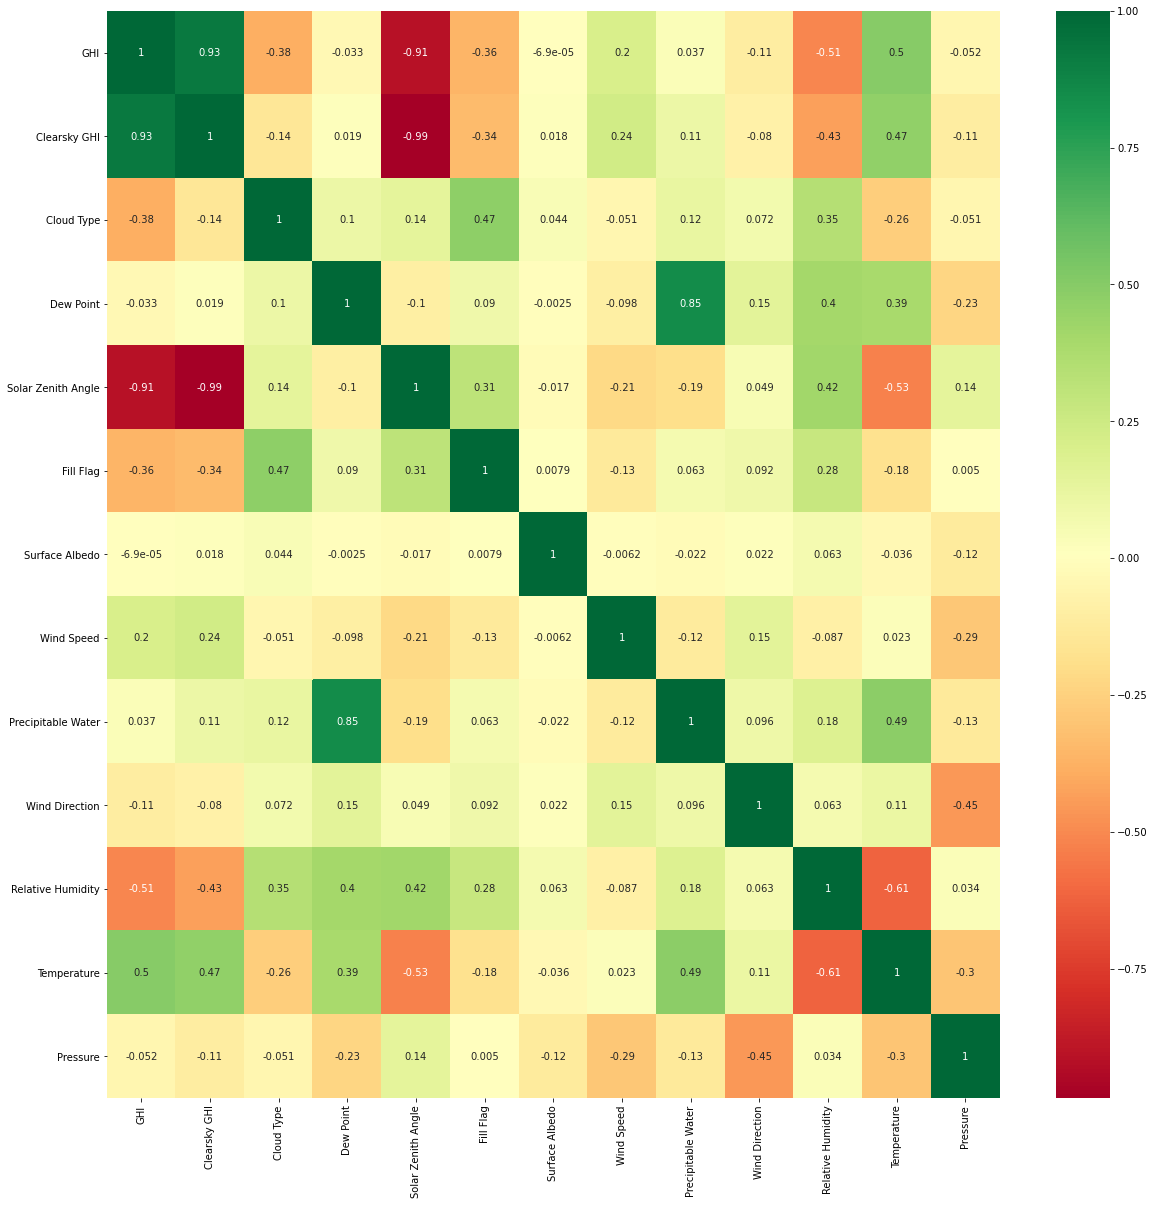

In [16]:
# (1) Get correlations of each features in dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Plot heatmap 
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")
 

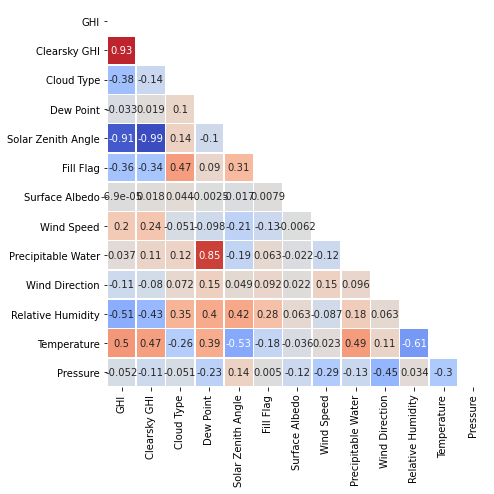

In [17]:
# (2) Correlation

def corrPairs(df):
    '''Pairwise correlation matrix'''
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot=True, cbar=False)

plt.figure(figsize=(7,7))
corrPairs(df)

### Regression plot


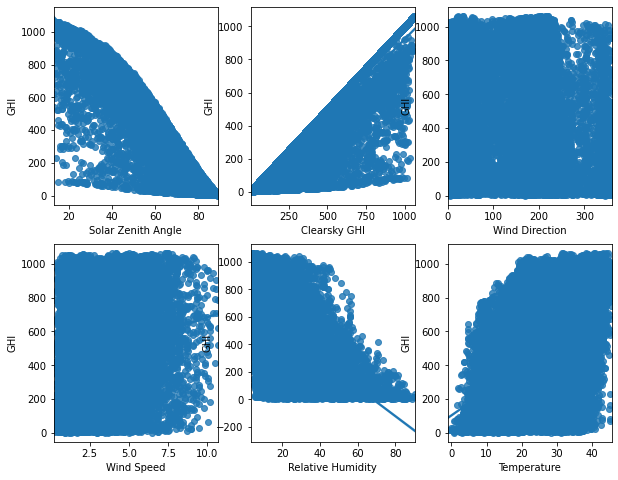

In [66]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
sns.regplot('Solar Zenith Angle', 'GHI',data=df,ax=axs[0, 0]) # -0.86
sns.regplot('Clearsky GHI', 'GHI',data=df,ax=axs[0, 1]) # 0.97
sns.regplot('Wind Direction', 'GHI',data=df,ax=axs[0, 2]) # -0.24
sns.regplot('Wind Speed', 'GHI',data=df,ax=axs[1, 0]) # 0.4
sns.regplot('Relative Humidity', 'GHI',data=df,ax=axs[1, 1]) # -0.5
sns.regplot('Temperature', 'GHI',data=df,ax=axs[1, 2]) # 0.56

plt.show() 

C:\Users\dharm\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


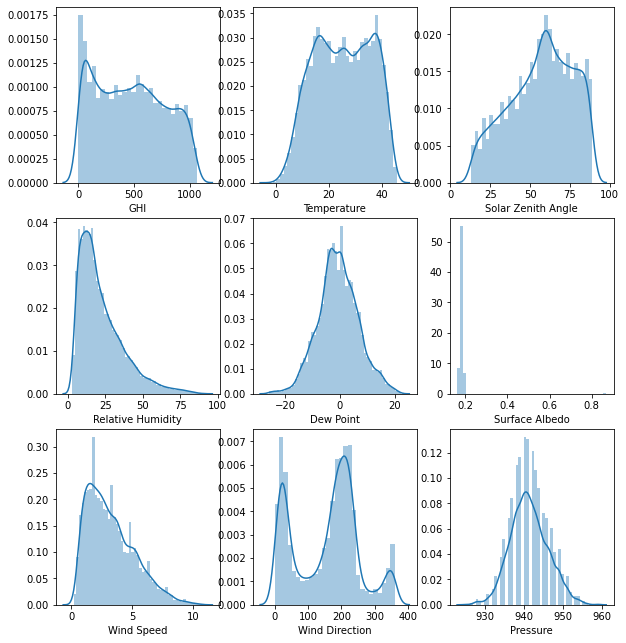

In [8]:
# Checking the distribution of each variable

fig, axs = plt.subplots(3, 3, figsize=(10, 11))
sns.distplot(df['GHI'],ax=axs[0, 0])
sns.distplot(df['Temperature'],ax=axs[0, 1])
sns.distplot(df['Solar Zenith Angle'],ax=axs[0, 2])
sns.distplot(df['Relative Humidity'],ax=axs[1, 0])
sns.distplot(df['Dew Point'],ax=axs[1, 1])
sns.distplot(df['Surface Albedo'],ax=axs[1, 2])
sns.distplot(df['Wind Speed'],ax=axs[2, 0])
sns.distplot(df['Wind Direction'],ax=axs[2, 1])
sns.distplot(df['Pressure'],ax=axs[2, 2])

plt.show()

### Analyzing Time related data

In [5]:
data1 = data[['Year','Month','Day','Hour','Minute','GHI']]

In [6]:
data2 = data1.copy()

In [7]:
# Removing the night time having GHI = 0

data2 = data2[data2['GHI'] != 0]

In [8]:
variables = data1.columns
variables

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI'], dtype='object')

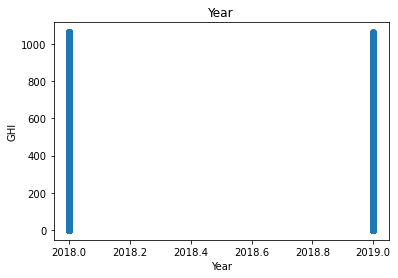

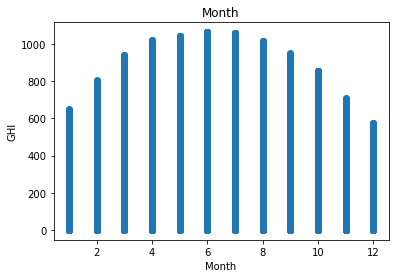

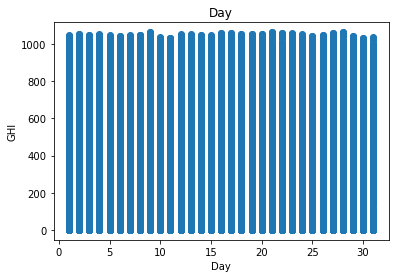

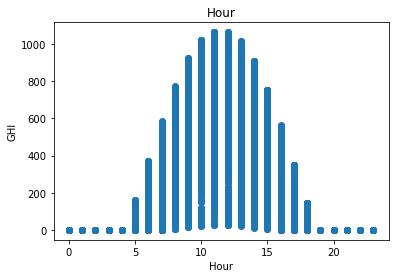

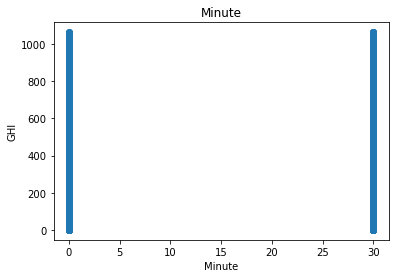

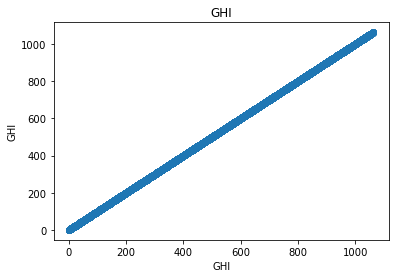

In [9]:
for feature in variables:
    data=data1.copy()
    plt.scatter(data[feature],data1['GHI'])
    plt.xlabel(feature)
    plt.ylabel('GHI')
    plt.title(feature)
    plt.show()

### Most GHI recorded between 11 am to 1pm

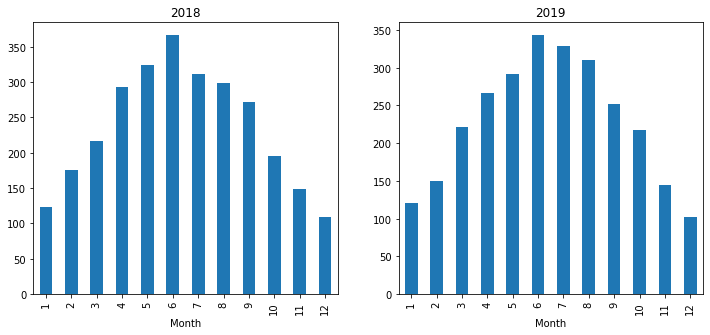

In [41]:
# Checking the trends over each month in the year 2018 & 2019 (Original Data)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

data[data['Year']==2018].groupby('Month').GHI.mean().plot(kind='bar',title='2018',ax=axs[0])
data[data['Year']==2019].groupby('Month').GHI.mean().plot(kind='bar',title='2019',ax=axs[1])

plt.show()

So, we can say that over the years the highest mean GHI is recorded between May-Augest and lowest in starting and end of the year

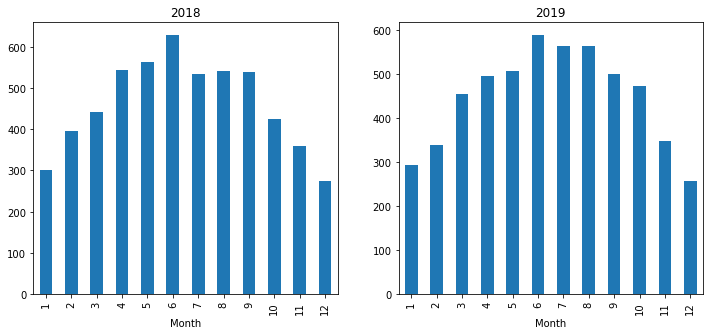

In [40]:
# Checking the trends over each month in the year 2018 & 2019 (This is after removing GHI=0) 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

data2[data2['Year']==2018].groupby('Month').GHI.mean().plot(kind='bar',title='2018',ax=axs[0])
data2[data2['Year']==2019].groupby('Month').GHI.mean().plot(kind='bar',title='2019',ax=axs[1])

plt.show()

In 2018 month of May and June has high GHI and in 2019 month of June and July has the highest GHI

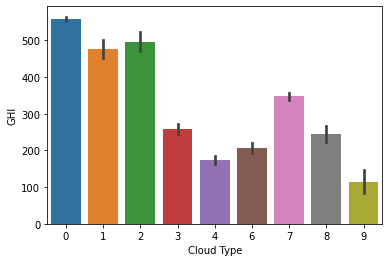

In [15]:
sns.barplot(x=df['Cloud Type'],y=df['GHI'],data=df)

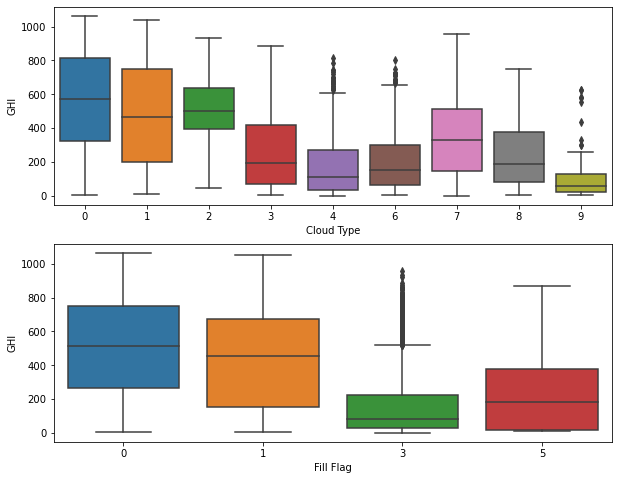

In [84]:
# Box plot   -- Error too many indices for array. Sol: changed the axs[0,0]& axs[0,1] to axs[0],axs[1] respectively

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.boxplot(x=df['Cloud Type'], y=df['GHI'],ax=axs[0])
sns.boxplot(x=df['Fill Flag'], y=df['GHI'],ax=axs[1])
plt.show()

Cloud Type 9 & 4 has more number of '0' values

### Model Building

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
# Dependent and Independent variable

X = df.drop('GHI',axis=1) # Independet variable
y = df['GHI'] # dependent variable

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [13]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (12162, 12)
X_test dimension=  (5213, 12)
y_train dimension=  (12162,)
y_train dimension=  (5213,)


### Model 1-  Linear Regression

In [14]:
# Fitting linear regression to our traing datset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

In [15]:
# Train Accuracy
lin_reg.score(X_train,y_train)
print('Train Accuracy =', lin_reg.score(X_train,y_train))

Train Accuracy = 0.9340606351230146


In [16]:
# Test Accuracy
lin_reg.score(X_test,y_test)
print('Test Accuracy =', lin_reg.score(X_test,y_test))

Test Accuracy = 0.9257426035503329


In [17]:
# To compute performance metrics for train data y_hat has been created
y_hat = lin_reg.predict(X_train)

#### Performance metrics of Linear Regression

In [18]:
# Checking Mean Absolute Error, Mean Squared Error, Root MSE for (Train data) 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_hat))
print('MSE:', metrics.mean_squared_error(y_train, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_hat)))

MAE: 44.57091936395306
MSE: 6121.891124820706
RMSE: 78.242514816567


In [19]:
# Checking Mean Absolute Error, Mean Squared Error, Root MSE for (Test data) 

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 45.824272838762845
MSE: 6725.78147910393
RMSE: 82.01086195805973


#### OLS - Ordinary Least Square method

In [20]:
# Now, let’s add some extra constant term to allow statsmodels to calculate the bias.
X_constant = sm.add_constant(X)
# Now, let’s instantiate and fit our model with an ordinary least square model.
model = sm.OLS(y, X_constant)
lin_reg = model.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHI   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.972e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        11:32:08   Log-Likelihood:            -1.0066e+05
No. Observations:               17375   AIC:                         2.013e+05
Df Residuals:                   17362   BIC:                         2.014e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2273.9629    154.947    -14.676      0.000   -2577.675   -1970.251
Clearsky GHI           0.9234      0.015     59.629      0.000       0.893       0.954
Cloud Type           -29.4231      0.271   -108.592      0.000     -29.954     -28.892
Dew Point              0.4804      0.241      1.997      0.046       0.009       0.952
Solar Zenith Angle     0.0183      0.237      0.077      0.939      -0.446       0.482
Fill Flag             23.9794      0.673     35.617      0.000      22.660      25.299
Surface Albedo        13.5200     24.446      0.553      0.580     -34.397      61.437
Wind Speed            -1.8003      0.345     -5.211      0.000      -2.477      -1.123
Precipitable Water   -23.5845      1.452    -16.237      0.000     -26.432     -20.737
Wind Direction        -0.0192      0.007     -2.702      0.007      -0.033      -0.005
Relative Humidity     -0.0626      0.114     -0.551      0.582      -0.286       0.160
Temperature            1.9102      0.168     11.381      0.000       1.581       2.239
Pressure               2.4389      0.162     15.078      0.000       2.122       2.756
==============================================================================
Omnibus:                    11396.166   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206572.926
Skew:                          -2.896   Prob(JB):                         0.00
Kurtosis:                      18.868   Cond. No.                     2.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2- Random Forest 

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
# Train Accuracy

y_pred = rf_random.predict(X_test)
rf_random.score(X_train,y_train)

0.9964661465186896

In [23]:
# Test Accuracy

rf_random.score(X_test,y_test)

0.9700419411624808

#### Performance Metrics of Random Forest Algorithm

In [24]:
# Checking Mean Absolute Error, Mean Squared Error, Root MSE for (Test data) 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19.13677728755035
MSE: 2713.4180150776906
RMSE: 52.090479121214564


### Model 3 - XGBoost 

In [37]:
from xgboost import XGBRegressor
import xgboost as xg

In [38]:
# Fitting XGBoost to the dataset

xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [34]:
# Train Accuracy
xgb.score(X_train,y_train)

0.9961606815283366

In [35]:
# Test Accuracy
xgb.score(X_test,y_test)

0.9733218757314148

#### Feature Importance Plot

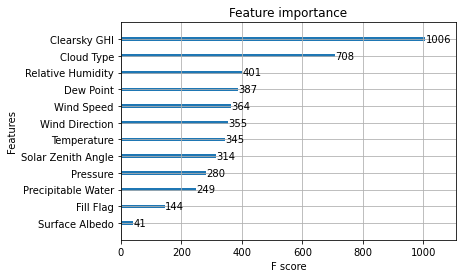

In [39]:
xg.plot_importance(xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#### Performance Metrics of XGBoost Algorithm

In [29]:
# Checking Mean Absolute Error, Mean Squared Error, Root MSE for (Test data) 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 20.285253313116897
MSE: 2416.3415724453084
RMSE: 49.15629738340051


#### XGBOOST Default parameters

## XGBOOST gave the best accuracy = 97.34%